## IsoMap

In [1]:
import os
os.chdir('/notebooks/src/CIFAR-10/')
import time
from lib.load_images import load_data
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = load_data()
from sklearn.manifold import TSNE, LocallyLinearEmbedding, Isomap
import pickle

Using TensorFlow backend.


In [2]:
## Saving the objects:
# with open('features_imgsize_224.pickle', 'w') as f:  # Python 3: open(..., 'wb')
#     pickle.dump([features_train, features_test], f)

# Getting back the objects:
with open('features_imgsize_224.pickle') as f:  # Python 3: open(..., 'rb')
    features_train, features_test = pickle.load(f)

import numpy as np
X_train = np.squeeze(features_train)
X_test = np.squeeze(features_test)

In [4]:
start = time.time()
tsne_features = Isomap(n_components=2, n_jobs=-1).fit_transform(X_train[0:25000])
end = time.time()
print((end-start) / 60)
np.savez('IsoMap_features_224', tsne_features=tsne_features)
print("DONE")

25.3848638693
DONE


### Plot TLSA projections

data loaded
[ 2.31104615  3.99067951  6.19652926 ..., -0.48786508  3.86473018
  1.45649906]
[  3.04002005 -13.78534521   5.19138508 ...,   0.42092119   0.88034673
  -6.03283072]


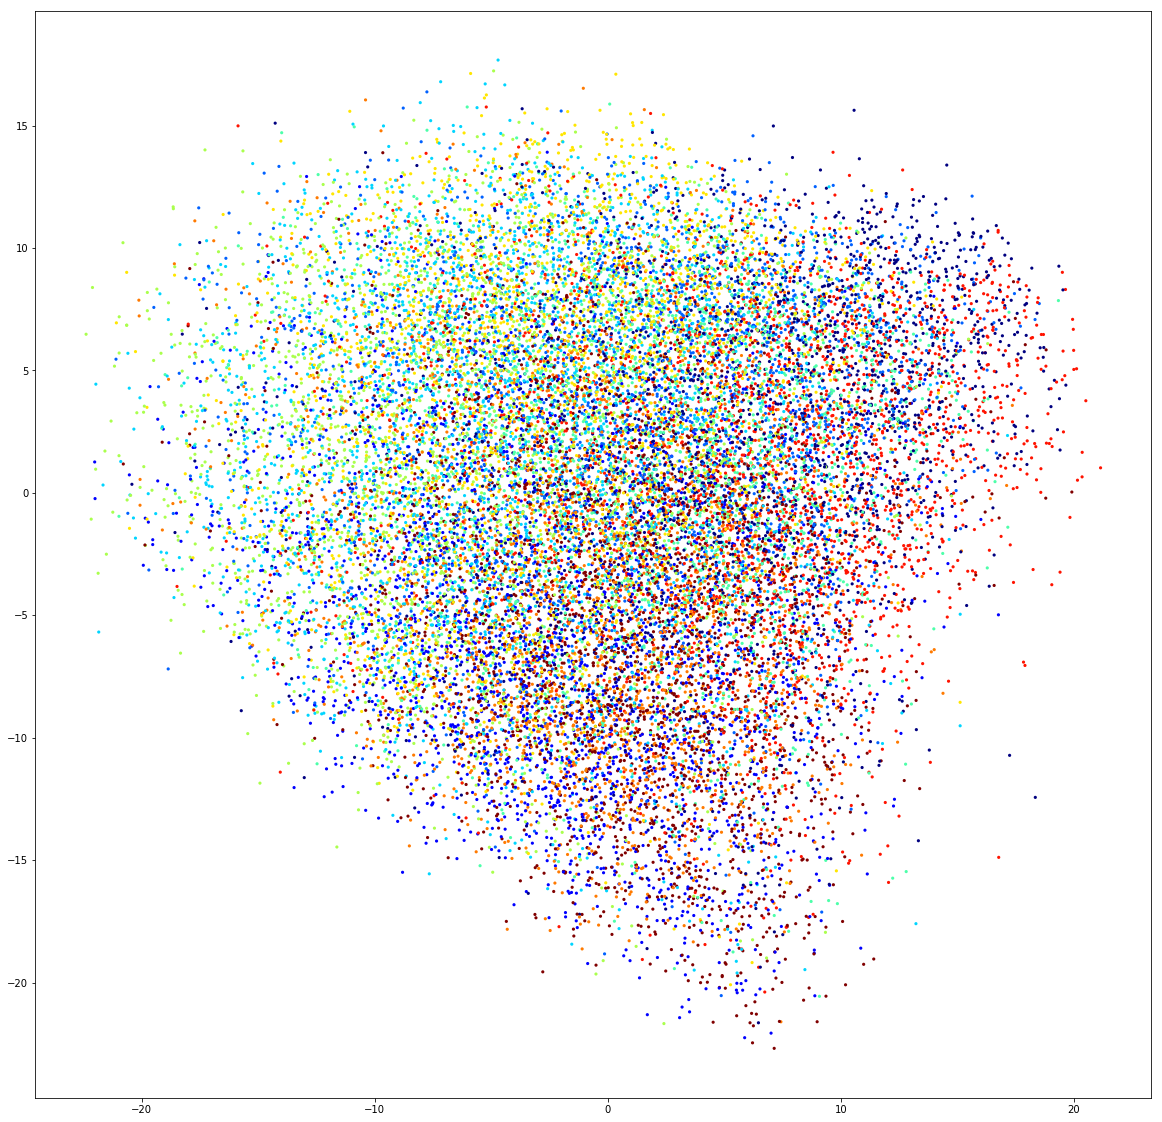

In [5]:
(_, y_train), (_, y_test) = cifar10.load_data()
y_train = np.squeeze(y_train)
print('data loaded')

y_train[0:25000].shape

print(tsne_features[:,0])
print(tsne_features[:,1])

from matplotlib import cm

import matplotlib.pyplot as plt
plt.figure(figsize=(20,20))
plt.scatter(tsne_features[:,0], tsne_features[:,1], c=(y_train[0:25000]/10.0), s=10, edgecolors='none', cmap=cm.jet)
plt.show()